In [1]:
# Ethnicity labels
ETHNICITIES = { 
    0: "White", 
    1: "Black",
    2: "Asian",
    3: "Indian",
    4: "Hispanic"
}

# Gender labels
GENDERS = { 
    0: "Male", 
    1: "Female"
}


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image

# Get images

In [5]:
data=pd.read_csv('../raw_data/age_gender_light.csv')
data.head()

,Unnamed: 0,age,ethnicity,gender,img_name,pixels
0,15964,40,0,0,20170117154530911.jpg.chip.jpg,207 38 58 78 113 127 126 116 132 150 157 152 1...
1,1745,15,0,1,20170109214626752.jpg.chip.jpg,135 133 70 48 29 19 18 41 70 82 89 98 107 108 ...
2,22721,8,4,1,20170104005525759.jpg.chip.jpg,49 40 64 75 76 74 95 107 115 123 129 137 148 1...
3,17266,46,0,1,20170104235246210.jpg.chip.jpg,128 125 131 124 67 10 6 19 27 80 166 199 208 2...
4,7119,26,1,0,20170116233450112.jpg.chip.jpg,69 79 90 94 96 94 90 88 86 88 85 84 83 83 83 8...


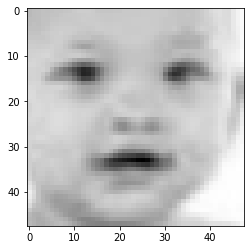

In [4]:
plt.imshow(np.array(data['pixels'][3].split(),dtype='float').reshape((48,48)),cmap='gray')

In [5]:
def to_img_48_48(pixel):
    return np.array(pixel.split(),dtype='float').reshape((48,48))

def to_img_48_48_3(pixel):
    layer=to_img_48_48(pixel)
    return np.array(np.dstack([layer, layer, layer]),dtype='int')

def to_img_224_224(pixel):
    img=Image.fromarray(np.uint8(to_img_48_48(pixel)), 'L')
    new_size=(224,224)
    img=img.resize(new_size)
    img = img.getdata()
    image_array = np.array(img)
    image_array.resize(new_size)
    return image_array

def to_img_224_224_3(img_224_224):
    layer=img_224_224
    return np.array(np.dstack([layer, layer, layer]),dtype='int')


In [6]:
data=data.sample(2500).reset_index()

In [7]:
data['images']=data['pixels'].apply(to_img_224_224)


In [8]:
data['images_3']=data['images'].apply(to_img_224_224_3)

In [9]:
data.head()

,index,age,ethnicity,gender,img_name,pixels,images,images_3
0,22855,8,0,1,20170104005606487.jpg.chip.jpg,8 9 15 33 52 65 70 75 83 91 98 105 109 108 110...,"[[8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 13, 15, 17, ...","[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ..."
1,15116,39,1,0,20170117185039604.jpg.chip.jpg,229 210 140 72 74 75 74 70 65 64 64 62 62 64 6...,"[[230, 229, 228, 227, 225, 221, 215, 206, 194,...","[[[230, 230, 230], [229, 229, 229], [228, 228,..."
2,3804,22,2,1,20170116170405273.jpg.chip.jpg,0 0 0 0 4 64 129 22 12 13 12 11 12 9 14 18 29 ...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,23059,82,0,1,20170109150955073.jpg.chip.jpg,199 174 144 159 172 165 147 138 151 150 162 18...,"[[203, 202, 200, 195, 190, 184, 176, 170, 162,...","[[[203, 203, 203], [202, 202, 202], [200, 200,..."
4,22577,78,1,0,20170117193425610.jpg.chip.jpg,142 120 95 87 74 73 55 51 46 57 55 58 61 61 70...,"[[146, 145, 143, 138, 134, 129, 123, 117, 112,...","[[[146, 146, 146], [145, 145, 145], [143, 143,..."


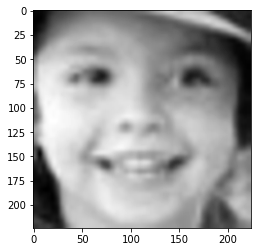

In [10]:
plt.imshow(data['images'][0],cmap='gray')

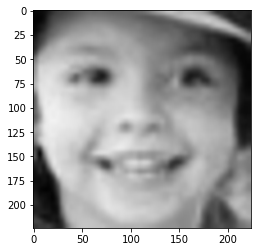

In [11]:
plt.imshow(data['images_3'][0],cmap='gray')

# Data viz

## Toolkit functions

In [12]:
def ethnicity_label(index):
    # Ethnicity labels
    ETHNICITIES = { 
        0: "White", 
        1: "Black",
        2: "Asian",
        3: "Indian",
        4: "Hispanic"
    }

    return ETHNICITIES[index]

def gender_label(index):
    # Gender labels
    GENDERS = { 
        0: "Male", 
        1: "Female"
    }

    return GENDERS[index]

def get_label(df):
    df['ethnicity_label']=df['ethnicity'].map(ethnicity_label)
    df['gender_label']=df['gender'].map(gender_label)
    return df

def display_feature(df,feature_name):
    '''Display a countplot based on seaborn with a "whitegrid" style'''
    fig = plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x=df[feature_name],
                       order=df[feature_name].value_counts(ascending=False).index);

    abs_values = df[feature_name].value_counts(ascending=False).values

    ax.bar_label(container=ax.containers[0], labels=abs_values)

## Playing with data

In [13]:
data=get_label(data)
data.head()

,index,age,ethnicity,gender,img_name,pixels,images,images_3,ethnicity_label,gender_label
0,22855,8,0,1,20170104005606487.jpg.chip.jpg,8 9 15 33 52 65 70 75 83 91 98 105 109 108 110...,"[[8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 13, 15, 17, ...","[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",White,Female
1,15116,39,1,0,20170117185039604.jpg.chip.jpg,229 210 140 72 74 75 74 70 65 64 64 62 62 64 6...,"[[230, 229, 228, 227, 225, 221, 215, 206, 194,...","[[[230, 230, 230], [229, 229, 229], [228, 228,...",Black,Male
2,3804,22,2,1,20170116170405273.jpg.chip.jpg,0 0 0 0 4 64 129 22 12 13 12 11 12 9 14 18 29 ...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Asian,Female
3,23059,82,0,1,20170109150955073.jpg.chip.jpg,199 174 144 159 172 165 147 138 151 150 162 18...,"[[203, 202, 200, 195, 190, 184, 176, 170, 162,...","[[[203, 203, 203], [202, 202, 202], [200, 200,...",White,Female
4,22577,78,1,0,20170117193425610.jpg.chip.jpg,142 120 95 87 74 73 55 51 46 57 55 58 61 61 70...,"[[146, 145, 143, 138, 134, 129, 123, 117, 112,...","[[[146, 146, 146], [145, 145, 145], [143, 143,...",Black,Male


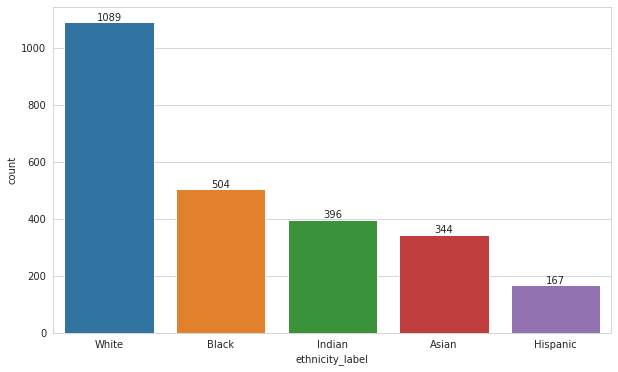

In [14]:
display_feature(data,'ethnicity_label')

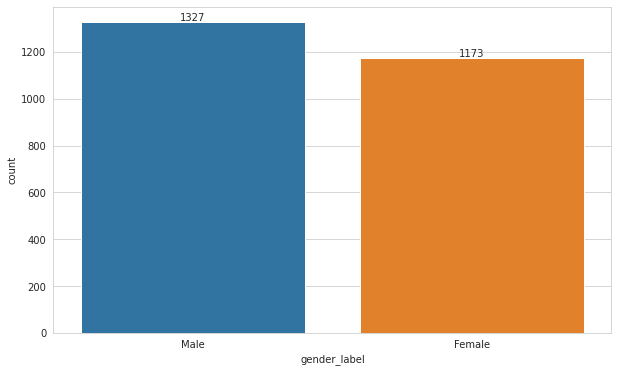

In [15]:
display_feature(data,'gender_label')

# Compute baseline

## Ethnicity gender

In [16]:
import random

In [17]:
data['test_gender']=0==data['gender']
data.head()

,index,age,ethnicity,gender,img_name,pixels,images,images_3,ethnicity_label,gender_label,test_gender
0,22855,8,0,1,20170104005606487.jpg.chip.jpg,8 9 15 33 52 65 70 75 83 91 98 105 109 108 110...,"[[8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 13, 15, 17, ...","[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",White,Female,False
1,15116,39,1,0,20170117185039604.jpg.chip.jpg,229 210 140 72 74 75 74 70 65 64 64 62 62 64 6...,"[[230, 229, 228, 227, 225, 221, 215, 206, 194,...","[[[230, 230, 230], [229, 229, 229], [228, 228,...",Black,Male,True
2,3804,22,2,1,20170116170405273.jpg.chip.jpg,0 0 0 0 4 64 129 22 12 13 12 11 12 9 14 18 29 ...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Asian,Female,False
3,23059,82,0,1,20170109150955073.jpg.chip.jpg,199 174 144 159 172 165 147 138 151 150 162 18...,"[[203, 202, 200, 195, 190, 184, 176, 170, 162,...","[[[203, 203, 203], [202, 202, 202], [200, 200,...",White,Female,False
4,22577,78,1,0,20170117193425610.jpg.chip.jpg,142 120 95 87 74 73 55 51 46 57 55 58 61 61 70...,"[[146, 145, 143, 138, 134, 129, 123, 117, 112,...","[[[146, 146, 146], [145, 145, 145], [143, 143,...",Black,Male,True


In [18]:
data.test_gender.mean()

0.5308

In [19]:
def compute_gender_baseline(df):
    df['test_gender']=(data['gender']==0)
    return df['test_gender'].mean()

In [20]:
compute_gender_baseline(data)

0.5308

# CNN model

## Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models

2022-05-30 17:45:09.103474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 17:45:09.103525: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
def image_normalizer(image):
    return image/255

In [23]:
selection=['ethnicity', 'gender', 'images_3']

In [24]:
data=data[selection]

In [25]:
### Normalizing pixels' intensities
X=data['images_3'].apply(image_normalizer)

### Defining y
y=data['ethnicity']

### Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [26]:
### Regularizers
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

In [27]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

def load_model():
    model = ResNet50(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model

def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    return model

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(5, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    return model

In [ ]:
model = load_model()
model = add_last_layers(model)
model.summary()

2022-05-30 17:45:15.113816: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-30 17:45:15.116807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-RM2V0FMT): /proc/driver/nvidia/version does not exist
2022-05-30 17:45:15.119795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-30 17:45:20.087304: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 200704000 exceeds 10% of free system memory.


In [ ]:
from tensorflow.keras import optimizers

def build_model():  
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 3, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[es])